In [67]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
df = pd.DataFrame()
df = pd.read_csv("D:/ETSII/3 CARRERA_ERASMUS/2T/AI/AIPROJECT/data/train_clean.csv")
df
dc = pd.DataFrame()
dc = pd.read_csv("D:/ETSII/3 CARRERA_ERASMUS/2T/AI/AIPROJECT/data/test_clean.csv")
dc

,beds,baths,size,lot_size,zip_code,price
0,3,3.0,2850.0,4200.0,98119,1175000.0
1,4,5.0,3040.0,5002.0,98106,1057500.0
2,3,1.0,1290.0,6048.0,98125,799000.0
3,3,2.0,2360.0,12196.8,98188,565000.0
4,3,3.5,1942.0,1603.0,98107,1187000.0
...,...,...,...,...,...,...
422,5,4.5,5580.0,13068.0,98146,3800000.0
423,3,2.5,1390.0,1570.0,98126,575000.0
424,3,2.5,2950.0,20473.2,98118,3105000.0
425,5,5.0,3010.0,4887.0,98115,1807000.0


In [69]:
X_train = df[['beds', 'baths', 'size', 'lot_size', 'zip_code']]  
y_train = df['price']  # What you want to predict


X_test =  dc[['beds', 'baths', 'size', 'lot_size', 'zip_code']] 
y_test = dc['price']  # What you want to predict


Make sure to leave the outliers outside


In [70]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

clf.fit_predict(df)

train_scores = clf.negative_outlier_factor_

np.sort(train_scores) [0:100]
threshold_value = -5
contrary_train = train_scores < threshold_value
np.count_nonzero(contrary_train)
df_new_train = df[train_scores > threshold_value].reset_index(drop=True)
#df_new_train = df_train.copy()
df_new_train.info()

X_train= df_new_train[['beds', 'baths', 'size', 'lot_size', 'zip_code']]
y_train= df_new_train['price']
X_test = dc[['beds', 'baths', 'size', 'lot_size', 'zip_code']]
y_test = dc['price']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      1652 non-null   int64  
 1   baths     1652 non-null   float64
 2   size      1652 non-null   float64
 3   lot_size  1652 non-null   float64
 4   zip_code  1652 non-null   int64  
 5   price     1652 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 77.6 KB


In [71]:
modelo_sgd = make_pipeline(StandardScaler(), linear_model.SGDRegressor(max_iter=1500))
param_grid = {
    'sgdregressor__alpha': [0.0001, 0.001, 0.01],  # Reduced range for alpha
    'sgdregressor__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'sgdregressor__penalty': [ 'l2', 'l1', 'elasticnet'],
    'sgdregressor__l1_ratio': [0.0, 0.1, 0.2],  # Reduced range for l1_ratio
    'sgdregressor__max_iter': [5000, 10000, 15000],  # Adjusted max_iter values
    'sgdregressor__tol': [1e-3, 1e-4]  # Adjusted tolerance values
}


clf = GridSearchCV(modelo_sgd, param_grid)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

Best parameters: {'sgdregressor__alpha': 0.01, 'sgdregressor__l1_ratio': 0.2, 'sgdregressor__learning_rate': 'optimal', 'sgdregressor__max_iter': 15000, 'sgdregressor__penalty': 'l2', 'sgdregressor__tol': 0.001}


In [77]:
modelo_sgd = make_pipeline(StandardScaler(), linear_model.SGDRegressor(alpha=0.01,l1_ratio=0.2, learning_rate='optimal',max_iter=15000,penalty='l2',tol= 0.001))

In [78]:
# Fit the SGDRegressor model to your training data
modelo_sgd.fit(X_train, y_train)


#Make predictions
y_predicted = modelo_sgd.predict(X_train)
print(y_predicted) #The prediction


__________________________________________________________________________________________________________________
[1317559.80371434 1066044.67312735 1066225.61685516 ...  755219.73558378
  842944.63109548  888261.86845321]


In [93]:
#Compute the errors

mse = mean_squared_error(y_train, y_predicted)
r2 = r2_score(y_train, y_predicted)
print("The mean squared error is: " , mse)
print("R^2 test: " ,r2)

The mean squared error is:  134095357773.38907
R^2 test:  0.5922403426760103


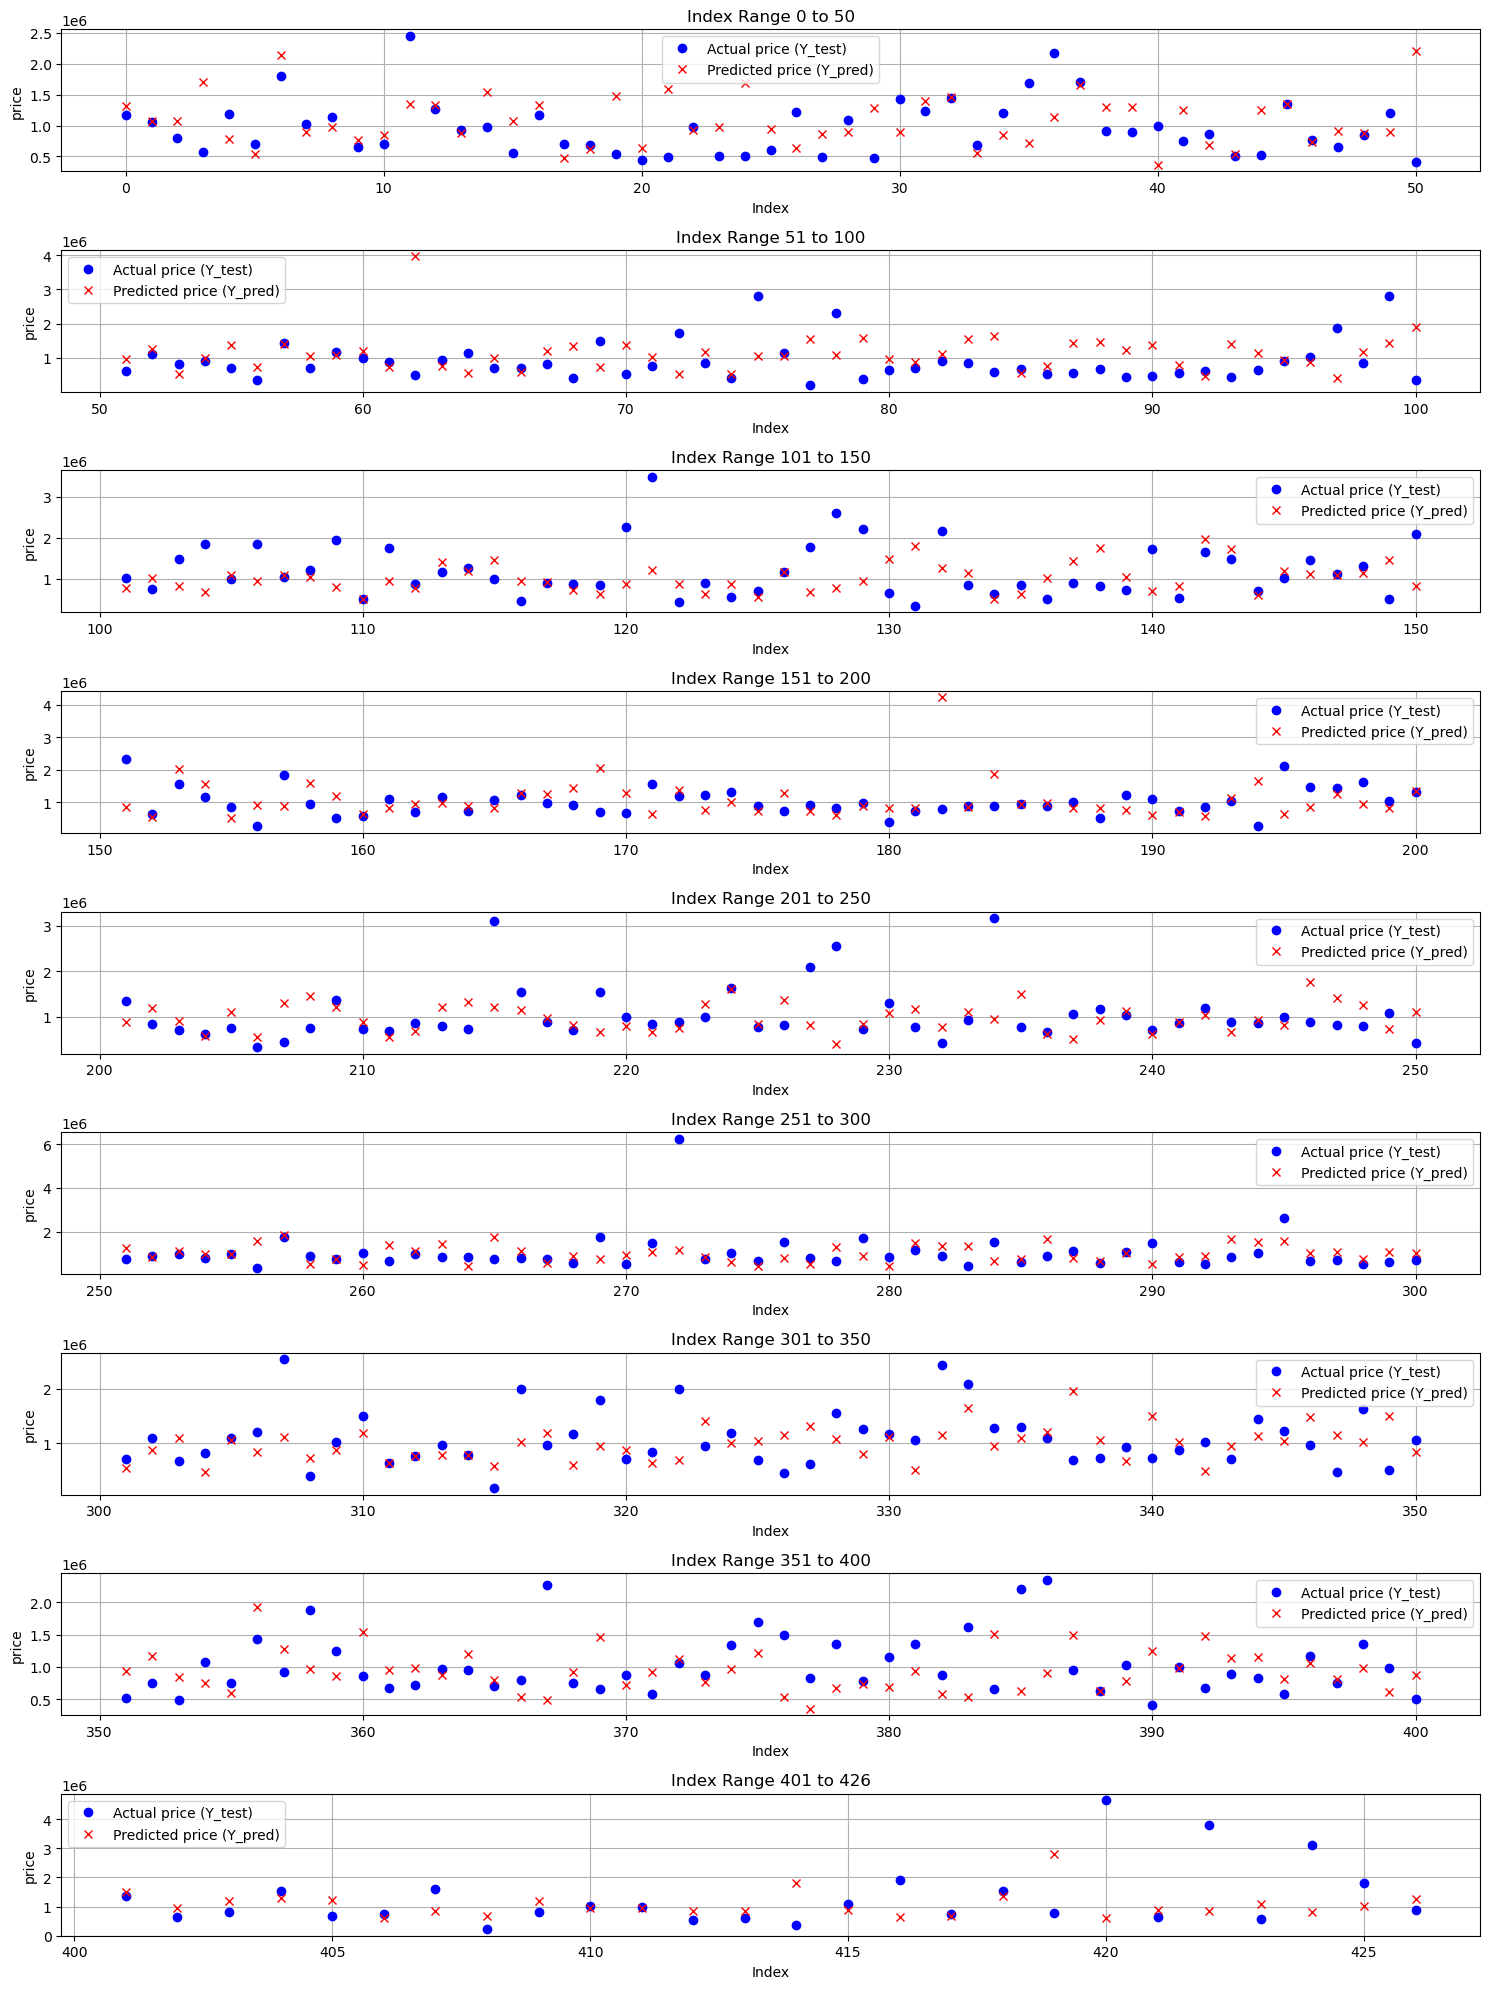

In [80]:
index = X_test.index
index_ranges = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 250), (251, 300), (301, 350), (351, 400), (401, len(index)-1)]

plt.figure(figsize=(15, 20))

for i, (start, end) in enumerate(index_ranges, start=1):
    plt.subplot(len(index_ranges), 1, i)
    plt.plot(index[start:end+1], y_test[start:end+1], label='Actual price (Y_test)', marker='o', linestyle='', color='blue')
    plt.plot(index[start:end+1], y_predicted[start:end+1], label='Predicted price (Y_pred)', marker='x', linestyle='', color='red')

    plt.title(f'Index Range {start} to {end}')
    plt.xlabel('Index')
    plt.ylabel('price')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


RangeIndex(start=0, stop=427, step=1)


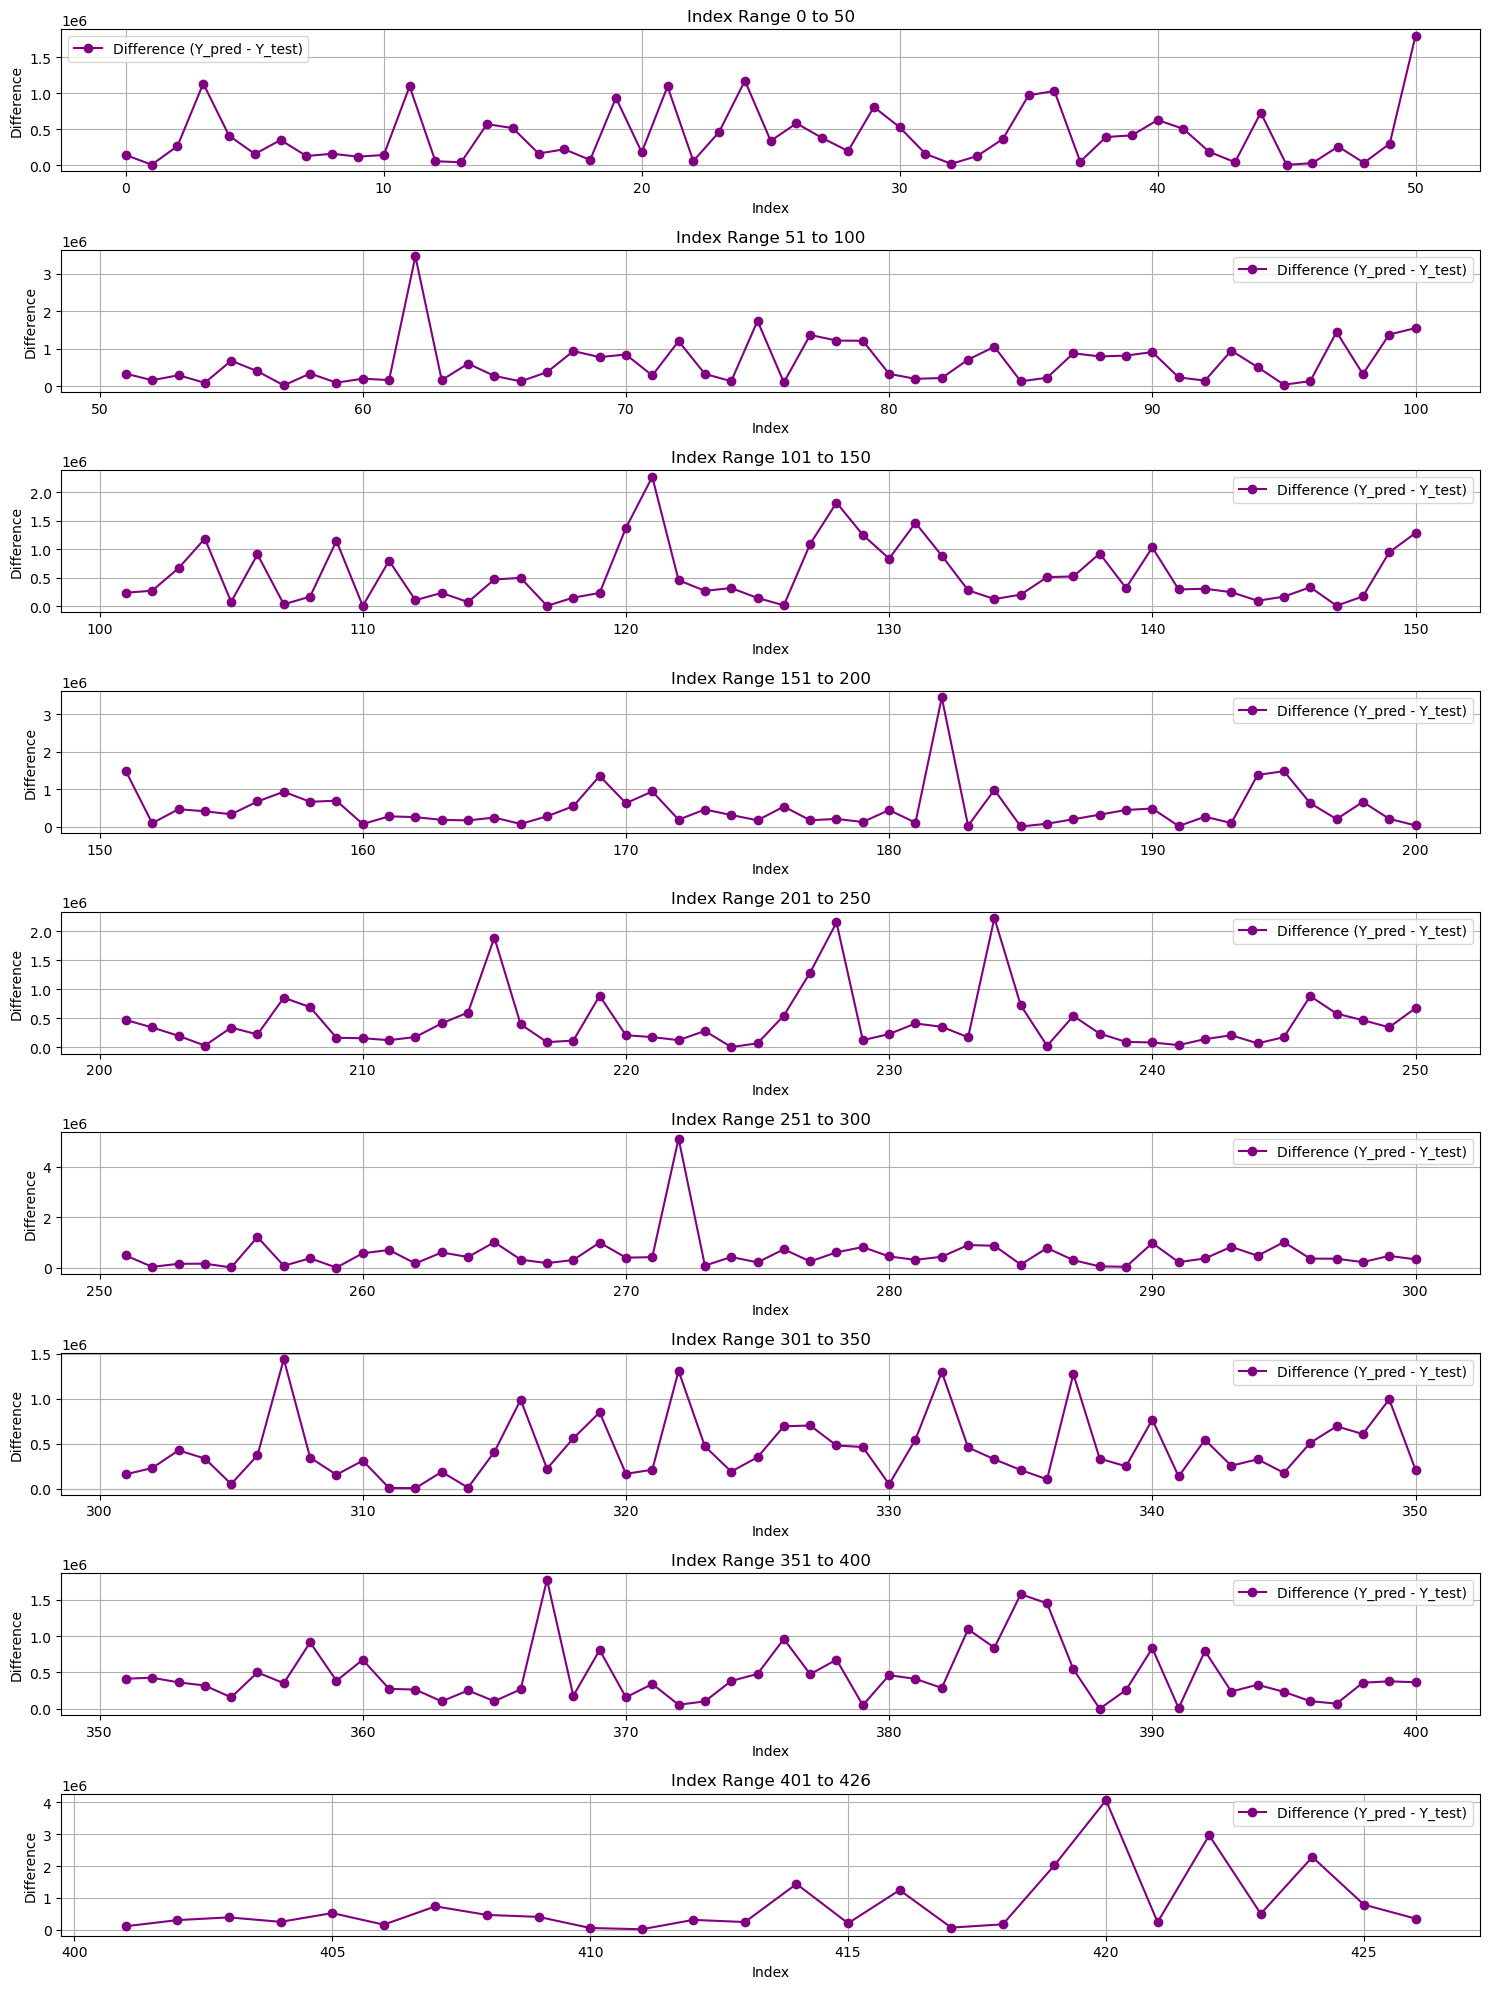

In [91]:
index = X_test.index
stop_number = index.stop
print(index)
index_ranges = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 250), (251, 300), (301, 350), (351, 400), (401, stop_number-1)]

plt.figure(figsize=(15, 20))
for i, (start, end) in enumerate(index_ranges, start=1):
    difference = np.abs(y_predicted[start:end+1] - y_test[start:end+1])  # Calculate difference for the current range only
    plt.subplot(len(index_ranges), 1, i)
    plt.plot(index[start:end+1], difference, label='Difference (Y_pred - Y_test)', marker='o', linestyle='-', color='purple')

    plt.title(f'Index Range {start} to {end}')
    plt.xlabel('Index')
    plt.ylabel('Difference')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

     